In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'notebook')
from tqdm import tqdm
import os
import cv2
import sys
import csv

In [9]:
df2 = pd.read_csv('sperical22.csv')
df2

,x,y,z,pie,theta,r,g,b
0,-4.416,-0.518,-1.313,0.116767,-1.283654,1,1,1
1,-4.418,-0.516,-1.313,0.116268,-1.283761,1,1,1
2,-4.416,-0.514,-1.313,0.115874,-1.283626,1,1,1
3,-4.420,-0.521,-1.309,0.117332,-1.284745,1,1,1
4,-4.417,-0.521,-1.311,0.117411,-1.284150,1,1,1
...,...,...,...,...,...,...,...,...
4542885,-0.362,4.620,1.572,-1.492601,1.243757,2,26,25
4542886,-0.364,4.623,1.573,-1.492222,1.243770,2,26,25
4542887,-0.367,4.622,1.575,-1.491560,1.243334,7,28,34
4542888,-0.367,4.630,1.575,-1.491696,1.243857,7,28,34


## y값인 theta를 -0.2125~1.7 값들만 취하기

In [10]:
theta = df2['theta']
print(theta[0:5])


theta_index = np.where(theta >=-0.2125)
print(theta_index)

export_data = []
for i in tqdm(theta_index[0]):
    export_data.append(df2.loc[i])

0   -1.283654
1   -1.283761
2   -1.283626
3   -1.284745
4   -1.284150
Name: theta, dtype: float64
(array([2132406, 2132407, 2132408, ..., 4542887, 4542888, 4542889],
      dtype=int64),)


100%|█████████████████████████████████████████████████████████████████████| 2410484/2410484 [02:01<00:00, 19838.79it/s]


In [11]:
df2 = pd.DataFrame(export_data, columns=['x','y','z','pie','theta','r','g','b'])
df2

,x,y,z,pie,theta,r,g,b
2132406,-4.247,-0.145,0.005,0.034128,1.569620,1.0,1.0,1.0
2132407,-4.247,-0.145,0.008,0.034128,1.568914,1.0,1.0,1.0
2132408,-4.248,-0.145,0.009,0.034120,1.568679,1.0,1.0,1.0
2132409,-4.252,-0.145,0.014,0.034088,1.567506,1.0,1.0,1.0
2132410,-4.246,-0.145,0.011,0.034137,1.568207,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
4542885,-0.362,4.620,1.572,-1.492601,1.243757,2.0,26.0,25.0
4542886,-0.364,4.623,1.573,-1.492222,1.243770,2.0,26.0,25.0
4542887,-0.367,4.622,1.575,-1.491560,1.243334,7.0,28.0,34.0
4542888,-0.367,4.630,1.575,-1.491696,1.243857,7.0,28.0,34.0


In [12]:
cols = ['r', 'g', 'b']
df2[cols] = df2[cols].applymap(np.int64)
df2

,x,y,z,pie,theta,r,g,b
2132406,-4.247,-0.145,0.005,0.034128,1.569620,1,1,1
2132407,-4.247,-0.145,0.008,0.034128,1.568914,1,1,1
2132408,-4.248,-0.145,0.009,0.034120,1.568679,1,1,1
2132409,-4.252,-0.145,0.014,0.034088,1.567506,1,1,1
2132410,-4.246,-0.145,0.011,0.034137,1.568207,1,1,1
...,...,...,...,...,...,...,...,...
4542885,-0.362,4.620,1.572,-1.492601,1.243757,2,26,25
4542886,-0.364,4.623,1.573,-1.492222,1.243770,2,26,25
4542887,-0.367,4.622,1.575,-1.491560,1.243334,7,28,34
4542888,-0.367,4.630,1.575,-1.491696,1.243857,7,28,34


In [13]:
new_csv_file = df2.to_csv(r'C:\Users\pc\Leica\up_02theta.csv', index=None)

In [14]:
dff = pd.read_csv('up_02theta.csv')
dff

,x,y,z,pie,theta,r,g,b
0,-4.247,-0.145,0.005,0.034128,1.569620,1,1,1
1,-4.247,-0.145,0.008,0.034128,1.568914,1,1,1
2,-4.248,-0.145,0.009,0.034120,1.568679,1,1,1
3,-4.252,-0.145,0.014,0.034088,1.567506,1,1,1
4,-4.246,-0.145,0.011,0.034137,1.568207,1,1,1
...,...,...,...,...,...,...,...,...
2410479,-0.362,4.620,1.572,-1.492601,1.243757,2,26,25
2410480,-0.364,4.623,1.573,-1.492222,1.243770,2,26,25
2410481,-0.367,4.622,1.575,-1.491560,1.243334,7,28,34
2410482,-0.367,4.630,1.575,-1.491696,1.243857,7,28,34


<IPython.core.display.Javascript object>


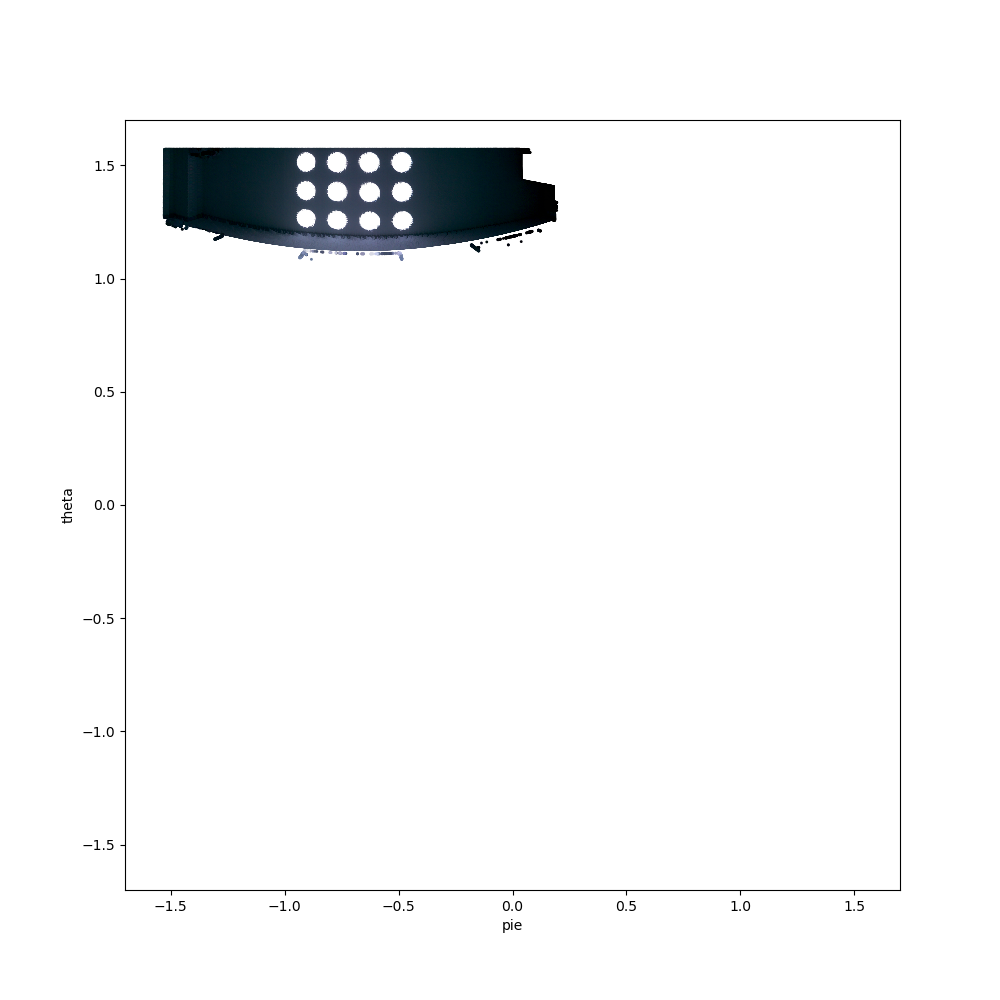

In [79]:
data = pd.read_csv('up_02theta.csv')

x = data['x']
y = data['y']
z = data['z']
p = data['pie']
t = data['theta']
r = data['r']
g = data['g']
b = data['b']

numtest = 2410484
px = [0 for i in range(numtest)]
py = [0 for i in range(numtest)]
pz = [0 for i in range(numtest)]
pr = [0 for i in range(numtest)]
pg = [0 for i in range(numtest)]
pb = [0 for i in range(numtest)]

R = [0 for i in range(numtest)]
theta = [0 for i in range(numtest)]
pie = [0 for i in range(numtest)]

for i in range(numtest):
    px[i] = x[i]
    py[i] = y[i]
    pz[i] = z[i]
    pie[i] = p[i]
    theta[i] = t[i]
    pr[i] = r[i]
    pg[i] = g[i]
    pb[i] = b[i]
    #print(px[i], py[i], pz[i], pr[i],pg[i],pb[i])


cc= [pr[i]*65536+pg[i]*256+pb[i] for i in range(numtest)]

#290421 빈 배열 만들어주기
fin_ccc = [0 for i in range(numtest)]

#16진수로 가져오면서 앞에 두자리인 '0x' 제외시키고 0을 채워주고 # 붙여서 출력
cc_hex = [hex(cc[i])[2:] for i in range(numtest)]
for i in range(numtest):
    l=len(cc_hex[i])
    o=''
    for k in range(0, 6-l):
        o = o + '0'
    fin_cc = '#'+ o + cc_hex[i]
    fin_ccc[i] = fin_cc
#print(fin_ccc)

##그리기
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

ax.scatter(pie,theta, marker='o', s=1, c=fin_ccc) ##s가 다른 상황도 여겨보자.

ax.set_xlabel('pie')
ax.set_ylabel('theta')
plt.xlim([-1.7,1.7])
plt.ylim([-1.7,1.7])

plt.show()

In [80]:
theta_m = np.min(theta)
theta_M = np.max(theta)
pie_m = np.min(pie)
pie_M = np.max(pie)

print('theta, pie 최솟값:',theta_m, pie_m)
print('theta, pie 최댓값:',theta_M, pie_M)

theta, pie 최솟값: 1.084612864896576 -1.5278073073568197
theta, pie 최댓값: 1.5705803928498772 0.1945433143044434


## 1920 :1080 transfer // 2880:1620 // 3840 : 2160 // 15360:8640 //19200:10800

In [81]:
theta_transfer=[]
pie_transfer=[]
Xcmax = 1.7
Xcmin = -1.7
Ycmax = 1.7
Ycmin = -0.2125
Xpmax = 1920 * 1.5
Xpmin = 0
Ypmax = 1080 * 1.5
Ypmin = 0

for i in range(numtest):
    pie_transfer.append(((Xpmax - Xpmin) / (Xcmax - Xcmin)) * (pie[i] - Xcmin))
print('변환된 pie값:',pie_transfer[0:5])

for i in range(numtest):
    theta_transfer.append(((Ypmax - Ypmin) / (Ycmax - Ycmin)) * (theta[i] - Ycmin))
print('변환된 theta값:',theta_transfer[0:5])

print('theta_transfer 원소 개수:',len(theta_transfer))
print('pr 원소 개수:',len(pr))

변환된 pie값: [1468.9088390193042, 1468.9088390193042, 1468.902039018274, 1468.8748709619272, 1468.9156422196195]
변환된 theta값: [1509.5602260253784, 1508.962229641076, 1508.763319658184, 1507.769519968494, 1508.3637190455127]
theta_transfer 원소 개수: 2410484
pr 원소 개수: 2410484


In [83]:
fields = ['x', 'y', 'z', 'theta', 'pie', 'r', 'g', 'b']

def plus(x, y, z, theta, pie, r, g, b):
    return[x, y, z, theta, pie, r, g, b]

edit_list = list(map(plus, px, py, pz, theta_transfer, pie_transfer, pr, pg, pb))

with open('new11_x1half.csv', 'w') as f:
    write = csv.writer(f)
    write.writerow(fields)
    write.writerows(edit_list)

print(edit_list[0:2])

[[-4.247, -0.145, 0.005, 1509.5602260253784, 1468.9088390193042, 1, 1, 1], [-4.247, -0.145, 0.008, 1508.962229641076, 1468.9088390193042, 1, 1, 1]]


In [84]:
df3 = pd.read_csv('new11_x1half.csv')
df3

,x,y,z,theta,pie,r,g,b
0,-4.247,-0.145,0.005,1509.560226,1468.908839,1,1,1
1,-4.247,-0.145,0.008,1508.962230,1468.908839,1,1,1
2,-4.248,-0.145,0.009,1508.763320,1468.902039,1,1,1
3,-4.252,-0.145,0.014,1507.769520,1468.874871,1,1,1
4,-4.246,-0.145,0.011,1508.363719,1468.915642,1,1,1
...,...,...,...,...,...,...,...,...
2410479,-0.362,4.620,1.572,1233.535468,175.679056,2,26,25
2410480,-0.364,4.623,1.573,1233.546552,176.000458,2,26,25
2410481,-0.367,4.622,1.575,1233.176666,176.561182,7,28,34
2410482,-0.367,4.630,1.575,1233.619699,176.445695,7,28,34


## theta, pie를 int로 

In [85]:
cols = ['theta', 'pie',]
df3[cols] = df3[cols].applymap(np.int64)
df3

,x,y,z,theta,pie,r,g,b
0,-4.247,-0.145,0.005,1509,1468,1,1,1
1,-4.247,-0.145,0.008,1508,1468,1,1,1
2,-4.248,-0.145,0.009,1508,1468,1,1,1
3,-4.252,-0.145,0.014,1507,1468,1,1,1
4,-4.246,-0.145,0.011,1508,1468,1,1,1
...,...,...,...,...,...,...,...,...
2410479,-0.362,4.620,1.572,1233,175,2,26,25
2410480,-0.364,4.623,1.573,1233,176,2,26,25
2410481,-0.367,4.622,1.575,1233,176,7,28,34
2410482,-0.367,4.630,1.575,1233,176,7,28,34


In [86]:
new_csv_file = df3.to_csv(r'C:\Users\pc\Leica\new12_x1half.csv', index=None)

In [87]:
df4 = pd.read_csv('new12_x1half.csv')
df4

,x,y,z,theta,pie,r,g,b
0,-4.247,-0.145,0.005,1509,1468,1,1,1
1,-4.247,-0.145,0.008,1508,1468,1,1,1
2,-4.248,-0.145,0.009,1508,1468,1,1,1
3,-4.252,-0.145,0.014,1507,1468,1,1,1
4,-4.246,-0.145,0.011,1508,1468,1,1,1
...,...,...,...,...,...,...,...,...
2410479,-0.362,4.620,1.572,1233,175,2,26,25
2410480,-0.364,4.623,1.573,1233,176,2,26,25
2410481,-0.367,4.622,1.575,1233,176,7,28,34
2410482,-0.367,4.630,1.575,1233,176,7,28,34


## plt로 나타내기 

<IPython.core.display.Javascript object>


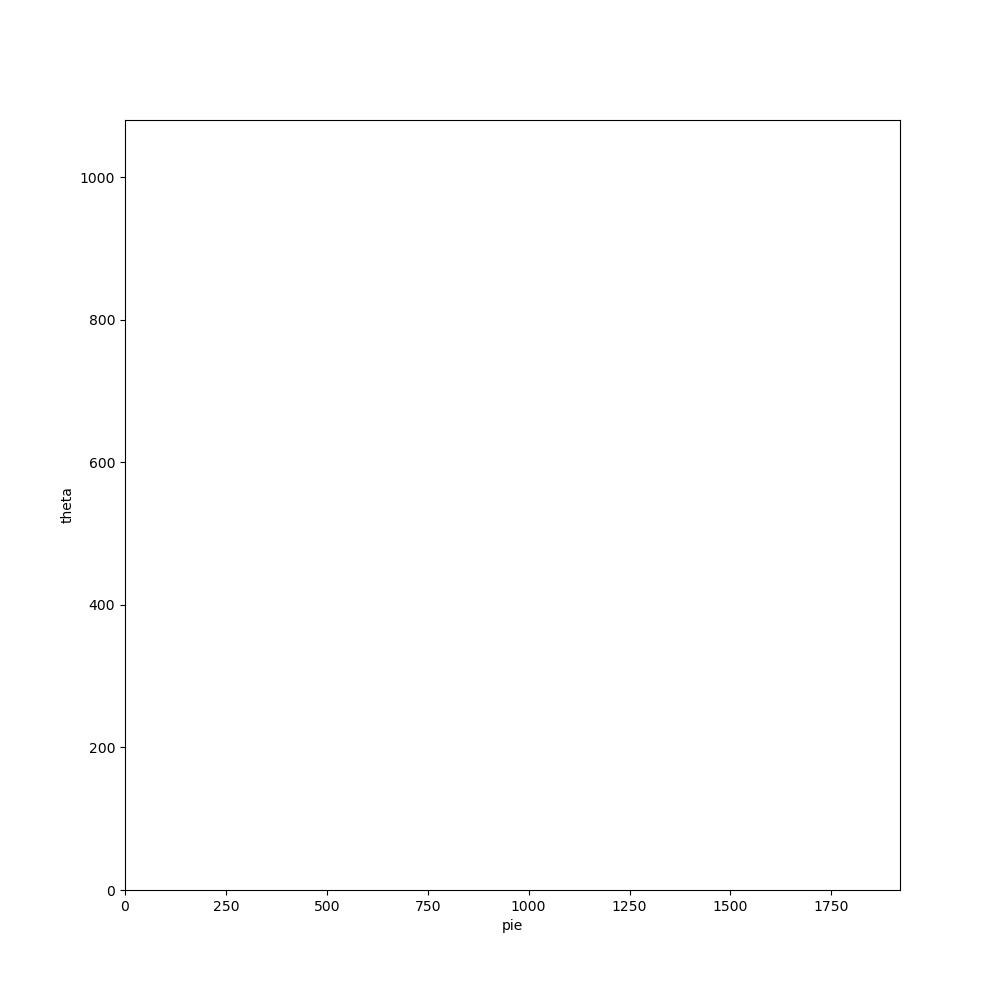

In [88]:
data = pd.read_csv('new12_x1half.csv')

x = data['x']
y = data['y']
z = data['z']
theta = data['theta']
pie = data['pie']
r = data['r']
g = data['g']
b = data['b']

numtest = 2410484
px = [0 for i in range(numtest)]
py = [0 for i in range(numtest)]
pz = [0 for i in range(numtest)]
pr = [0 for i in range(numtest)]
pg = [0 for i in range(numtest)]
pb = [0 for i in range(numtest)]
pt = [0 for i in range(numtest)]
pp = [0 for i in range(numtest)]

for i in range(numtest):
    px[i] = x[i]
    py[i] = y[i]
    pz[i] = z[i]
    pr[i] = r[i]
    pg[i] = g[i]
    pb[i] = b[i]
    pt[i] = theta[i]
    pp[i] = pie[i]
    #print(px[i], py[i], pz[i], pr[i],pg[i],pb[i])


cc= [pr[i]*65536+pg[i]*256+pb[i] for i in range(numtest)]

#290421 빈 배열 만들어주기
fin_ccc = [0 for i in range(numtest)]

#16진수로 가져오면서 앞에 두자리인 '0x' 제외시키고 0을 채워주고 # 붙여서 출력
cc_hex = [hex(cc[i])[2:] for i in range(numtest)]
for i in range(numtest):
    l=len(cc_hex[i])
    o=''
    for k in range(0, 6-l):
        o = o + '0'
    fin_cc = '#'+ o + cc_hex[i]
    fin_ccc[i] = fin_cc
#print(fin_ccc)

##그리기
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

ax.scatter(pp,pt, marker='o', s=1, c=fin_ccc) ##s가 다른 상황도 여겨보자.

ax.set_xlabel('pie')
ax.set_ylabel('theta')
#lt.axis('off')
plt.xlim([0,1920])
plt.ylim([0,1080])

plt.show()

## putpixel로 나타내기 

In [89]:
from PIL import Image

def newImg():
    img = Image.new('RGB', (2880, 1620)) #width, height
        
    for i, j, k, l, m in zip(pp, pt, pr, pg, pb):
        img.putpixel((i,j), (k,l,m,255))
    img.save('input/sqr1half.png')
        #print(type(i[0]))
    
    return img

wallpaper = newImg()
wallpaper.show()

/2880
라디안 투 디그리
a * 180 / 3.141592 
0.2125 / 3.141592 = 0.0676도 -> 라이카가 움직이는 각도

## Circle Detect 

In [4]:
def houghCircle():
    # 원이 있는 이미지를 올림.
    img1 = cv2.imread('input/sqr1half.png')
    img2 = img1.copy()

    # 0~9까지 가우시안 필터로 흐리게 만들어 조절함.
    img2 = cv2.GaussianBlur(img2, (9, 9), 0)
    # 그레이 이미지로 바꿔서 실행해야함.
    imgray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # 원본과 비율 / 찾은 원들간의 최소 중심거리 / param1, param2를 조절해 원을 찾음
    circles = cv2.HoughCircles(imgray, cv2.HOUGH_GRADIENT, 1, 10, param1=30, param2=40, minRadius=0, maxRadius=0)

    if circles is not None:
        circles = np.uint16(np.around(circles))

        print('circles center:',circles)

        for i in circles[0, :]:
            #cv2.circle(img, center, radian, color, thickness)
            cv2.circle(img1, (i[0], i[1]), i[2], (0, 0, 255), 2)

        #cv2.imshow('ori',img2)
        cv2.imshow('HoughCircle', img1)

        cv2.imwrite('output/detect.png',img1)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print('원을 찾을 수 없음')

houghCircle()

circles center: [[[ 784 1458   37]
  [1024 1456   38]
  [ 784 1348   37]
  [ 668 1458   36]
  [ 668 1350   36]
  [ 904 1346   39]
  [1024 1346   37]
  [ 904 1458   38]
  [1030 1240   34]
  [ 780 1242   34]
  [ 906 1240   38]
  [ 668 1246   35]]]


## get 3D coordinates(x,y,z) of Circle Cetners

In [28]:
csv = pd.read_csv('new2.csv')

find_row = csv.loc[(csv['theta'] == 972)]
find_row = find_row.iloc[:2]
print(find_row)

          x      y      z  theta  pie  r  g   b
7214 -4.223 -0.098  0.255    972  973  0  5  18
7349 -4.223 -0.095  0.255    972  972  0  2  16
